## Постановка задачи

**Предметная область:** работа магического портала, использующего энергию эфира, потоки стихий и параметры источников для поддержания стабильности перехода.

**Цель задачи:**  
на основе физических и магических параметров портала **оценить стабильность его работы**, представленную показателем  

"Гармония Бессмертия" — это целевая переменная (реальный коэффициент, 0–1).

Таким образом, задача относится к регрессии (целевой признак — числовой непрерывный).

---

### Признаковое пространство

| Признак | Смысл | Диапазон / Единицы | Тип данных |
|:--|:--|:--|:--|
| Вектор Мощи | Позиция механизма управления порталом | любое значение | float |
| Скорость перехода через портал | Скорость перемещения объектов | ≥ 0 | float |
| Приток Силы Потока | Магическая сила, питающая ядро | ≥ 0 | float |
| Ритм магического ядра | Частота вращения ядра | ≥ 0 | float |
| Поток Энергий | Преобразование внешней энергии | ≥ 0 | float |
| Сила Левого Потока | Мощность левого потока | ≥ 0 | float |
| Сила Правого Потока | Мощность правого потока | ≥ 0 | float |
| Пламя Стихий | Температура магического потока | °C, 0–1500 | float |
| Температура вдоха Истока | Температура входящего воздуха | °C, ~700–750 | int |
| Температура выдоха Истока | Температура выходящего воздуха | °C | float |
| Приток давления Выдоха Истока | Давление потока на выходе | любое | float |
| Давление входа Истока | Давление воздуха на входе | любое | float |
| Давление выдоха Истока | Давление воздуха на выходе | любое | float |
| Древний Ветер | Давление древней магической энергии | любое | float |
| Печать Чародея | Параметр впрыска магии | %, 0–100 | float |
| Эмульсия Истока | Количество магического топлива | ≥ 0 | float |
| Дыхание Истока | Коэффициент угасания ускорителя | 0–1 | float |
| Гармония Бессмертия | Коэффициент стабильности ядра (целевая) | 0–1 | float |
| Тип Вектора Мощи | Классификация позиции механизма | — | категориальный |
| Номер пометки | ID записи в журнале | любое | int |


---

### Ограничения и неиспользуемые признаки
- `Номер пометки` — уникальный идентификатор, не несёт информации.
- Формулы, напрямую использующие целевой признак (`Гармония Бессмертия`) исключаются из обучения, т.к. вызывают утечку данных.


In [192]:
import sys
!{sys.executable} -m pip uninstall pandas numpy scipy scikit-learn pyod -y

Found existing installation: pandas 1.5.3
Uninstalling pandas-1.5.3:
  Successfully uninstalled pandas-1.5.3
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: scipy 1.10.1
Uninstalling scipy-1.10.1:
  Successfully uninstalled scipy-1.10.1
Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Found existing installation: pyod 1.0.9
Uninstalling pyod-1.0.9:
  Successfully uninstalled pyod-1.0.9


In [193]:
import sys
!{sys.executable} -m pip install numpy==1.23.5

  Using cached numpy-1.23.5-cp310-cp310-win_amd64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp310-cp310-win_amd64.whl (14.6 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires pandas>=1.0.5, which is not installed.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, which is not installed.
category-encoders 2.7.0 requires scipy>=1.0.0, which is not installed.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, which is not installed.
imbalanced-learn 0.13.0 requires scipy<2,>=1.10.1, which is not installed.
lightgbm 4.6.0 requires scipy, which is not installed.
plotly-resampler 0.10.0 requires pandas>=1, which is not installed.
pmdarima 2.0.4 requires pandas>=0.19, which is not installed.
pmdarima 2.0.4 requires scikit-learn>=0.22, which is not installed.
pmdarima 2.0.4 requires scipy>=1.3.2, which is not installed.
pycaret 3.3.2 requires pandas<2.2.0, which is not installed.
pycaret 3.3.2 requires pyod>=1.1.3, which is not installed.
pycar

In [194]:
import sys
!{sys.executable} -m pip install pandas==1.5.3

  Using cached pandas-1.5.3-cp310-cp310-win_amd64.whl.metadata (12 kB)
Using cached pandas-1.5.3-cp310-cp310-win_amd64.whl (10.4 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, which is not installed.
category-encoders 2.7.0 requires scipy>=1.0.0, which is not installed.
pmdarima 2.0.4 requires scikit-learn>=0.22, which is not installed.
pmdarima 2.0.4 requires scipy>=1.3.2, which is not installed.
pycaret 3.3.2 requires pyod>=1.1.3, which is not installed.
pycaret 3.3.2 requires scikit-learn>1.4.0, which is not installed.
pycaret 3.3.2 requires scipy<=1.11.4,>=1.6.1, which is not installed.
sktime 0.26.0 requires scikit-learn<1.5.0,>=0.24, which is not installed.
sktime 0.26.0 requires scipy<2.0.0,>=1.2, which is not installed.
statsmodels 0.14.4 requires scipy!=1.9.2,>=1.8, which is not installed.
tbats 1.1.3 requires scikit-learn, which is not installed.
tbats 1.1.3 requires scipy, which is not installed.
pycaret 3.3.2 requi

In [195]:
import sys
!{sys.executable} -m pip install scipy==1.10.1

  Using cached scipy-1.10.1-cp310-cp310-win_amd64.whl.metadata (58 kB)
Using cached scipy-1.10.1-cp310-cp310-win_amd64.whl (42.5 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, which is not installed.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, which is not installed.
pmdarima 2.0.4 requires scikit-learn>=0.22, which is not installed.
pycaret 3.3.2 requires pyod>=1.1.3, which is not installed.
pycaret 3.3.2 requires scikit-learn>1.4.0, which is not installed.
scikit-plot 0.3.7 requires scikit-learn>=0.18, which is not installed.
sktime 0.26.0 requires scikit-learn<1.5.0,>=0.24, which is not installed.
tbats 1.1.3 requires scikit-learn, which is not installed.
yellowbrick 1.5 requires scikit-learn>=1.0.0, which is not installed.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
pycaret 3.3.2 requires joblib<1.4,>=1.2.0, but you have joblib 1.5.2 which is incompatible

In [196]:
import sys
!{sys.executable} -m pip install scikit-learn==1.2.2

  Using cached scikit_learn-1.2.2-cp310-cp310-win_amd64.whl.metadata (11 kB)
Using cached scikit_learn-1.2.2-cp310-cp310-win_amd64.whl (8.3 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.3.2 requires pyod>=1.1.3, which is not installed.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.
pycaret 3.3.2 requires joblib<1.4,>=1.2.0, but you have joblib 1.5.2 which is incompatible.
pycaret 3.3.2 requires scikit-learn>1.4.0, but you have scikit-learn 1.2.2 which is incompatible.

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [197]:
import sys
!{sys.executable} -m pip install pyod==1.0.9

  Using cached pyod-1.0.9-py3-none-any.whl
  Using cached numpy-2.2.6-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl (15.8 MB)

  Attempting uninstall: numpy

    Found existing installation: numpy 1.23.5

   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
    Uninstalling numpy-1.23.5:
   ---------------------------------------- 0/2 [numpy]
      Successfully uninstalled numpy-1.23.5
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   -------------------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.
pycaret 3.3.2 requires joblib<1.4,>=1.2.0, but you have joblib 1.5.2 which is incompatible.
pycaret 3.3.2 requires pyod>=1.1.3, but you have pyod 1.0.9 which is incompatible.
pycaret 3.3.2 requires scikit-learn>1.4.0, but you have scikit-learn 1.2.2 which is incompatible.

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [198]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.model_selection import train_test_split

SEED = 42
np.random.seed(SEED)
random.seed(SEED)

import sys
print("Python:", sys.version)
print("Pandas:", pd.__version__)
print("NumPy:", np.__version__)

Python: 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]
Pandas: 1.5.3
NumPy: 1.26.4


### проверка кодировки

In [199]:
encodings = ["cp1251", "utf-8", "utf-8-sig", "latin-1"]

detected = None
for enc in encodings:
    try:
        _tmp = pd.read_csv('../data/portal_data.csv', encoding=enc, nrows=3)
        detected = enc
        break
    except Exception:
        pass

print(f"Кодировка: {detected}")
_tmp


Кодировка: cp1251


,Вектор Мощи|Скорость перехода через портал|Приток Силы Потока|Ритм магического ядра|Поток Энергий|Сила Левого Потока|Сила Правого Потока|Пламя Стихий|Температура вдоха Истока|Температура выдоха Истока|Приток давления Выдоха Истока|Давление вдоха Истока|Давление выдоха Истока|Древний Ветер|Печать Чародея|Эмульсия Истока|Дыхание Истока|Гармония Бессмертия|Тип Вектора Мощи|Номер пометки
0,1.138|1.54332|289.964|141.31815761667454|6677....
1,2.088|-|6960.18|144.1117665240017|6828.469|28....
2,3.144|4.6299600000000005|8379.229|145.22085345...


### разделение через |, вместо - NaN

In [200]:
data = pd.read_csv('../data/portal_data.csv', encoding=detected, sep="|")

data = data.replace("-", np.nan).replace("Не определено", np.nan)

print(data.shape)
data.head(10)


(11934, 20)


,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Температура выдоха Истока,Приток давления Выдоха Истока,Давление вдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия,Тип Вектора Мощи,Номер пометки
0,1.138,1.54332,289.964,141.318158,6677.380,7.584,7.584,464.006,736,NaN,1.096,NaN,5.947,NaN,7.137,0.082,0.95,0.975,Слабый,0
1,2.088,NaN,6960.180,144.111767,6828.469,28.204,28.204,635.401,736,581.658,1.331,1.394603,7.282,1.019,10.655,0.287,0.95,0.975,Слабый,1
2,3.144,4.6299600000000005,8379.229,145.220853,7111.811,60.358,60.358,606.002,736,NaN,1.389,NaN,7.574,NaN,13.086,0.259,0.95,0.975,Ниже среднего,2
3,4.161,6.17328,14724.395,162.050156,7792.630,113.774,113.774,661.471,736,NaN,1.658,NaN,9.007,NaN,18.109,0.358,0.95,0.975,Ниже среднего,3
4,5.140,7.7166,21636.432,201.513586,8494.777,175.306,175.306,731.494,736,645.642,2.078,NaN,11.197,1.026,26.373,0.522,0.95,0.975,Выше среднего,4
5,6.175,9.25992,29792.731,241.630782,8828.360,246.278,246.278,800.434,736,676.397,2.501,NaN,13.356,1.03,35.760,0.708,0.95,0.975,Выше среднего,5
6,7.148,10.80324,38982.180,280.448510,9132.429,332.077,332.077,854.747,736,NaN,2.963,NaN,15.679,NaN,45.881,0.908,0.95,0.975,Сильный,6
7,8.206,12.34656,50996.808,323.328632,9318.562,437.989,437.989,952.122,736,NaN,3.576,NaN,18.632,NaN,62.440,1.236,0.95,0.975,Сильный,7
8,9.300,13.88988,72763.329,372.843693,9778.528,644.905,644.905,1115.797,736,NaN,4.498,1.394603,22.811,NaN,92.556,1.832,0.95,0.975,Сильный,8
9,1.138,1.54332,379.880,141.934538,6683.916,7.915,7.915,464.017,736,550.985,1.100,NaN,5.963,1.019,3.879,0.079,0.95,0.976,Слабый,9


###  анализ типов данных

In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Вектор Мощи                     11934 non-null  float64
 1   Скорость перехода через портал  10731 non-null  object 
 2   Приток Силы Потока              11934 non-null  float64
 3   Ритм магического ядра           11934 non-null  float64
 4   Поток Энергий                   11934 non-null  float64
 5   Сила Левого Потока              11934 non-null  float64
 6   Сила Правого Потока             11934 non-null  float64
 7   Пламя Стихий                    11934 non-null  float64
 8   Температура вдоха Истока        11934 non-null  int64  
 9   Температура выдоха Истока       2387 non-null   object 
 10  Приток давления Выдоха Истока   11934 non-null  float64
 11  Давление вдоха Истока           2439 non-null   object 
 12  Давление выдоха Истока          

### приведение к нужному типу

In [202]:
obj_to_float = [
    "Скорость перехода через портал",
    "Температура выдоха Истока",
    "Древний Ветер",
    "Давление вдоха Истока"
]

for c in obj_to_float:
    data[c] = pd.to_numeric(data.get(c), errors="coerce")

data["Номер пометки"] = pd.to_numeric(data["Номер пометки"], errors="coerce").astype("Int64")
data["Тип Вектора Мощи"] = data["Тип Вектора Мощи"].astype("category")

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Вектор Мощи                     11934 non-null  float64 
 1   Скорость перехода через портал  10731 non-null  float64 
 2   Приток Силы Потока              11934 non-null  float64 
 3   Ритм магического ядра           11934 non-null  float64 
 4   Поток Энергий                   11934 non-null  float64 
 5   Сила Левого Потока              11934 non-null  float64 
 6   Сила Правого Потока             11934 non-null  float64 
 7   Пламя Стихий                    11934 non-null  float64 
 8   Температура вдоха Истока        11934 non-null  int64   
 9   Температура выдоха Истока       2387 non-null   float64 
 10  Приток давления Выдоха Истока   11934 non-null  float64 
 11  Давление вдоха Истока           2439 non-null   float64 
 12  Давление выдоха Ис

In [203]:
data

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Температура выдоха Истока,Приток давления Выдоха Истока,Давление вдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия,Тип Вектора Мощи,Номер пометки
0,1.138,1.54332,289.964,141.318158,6677.380,7.584,7.584,464.006,736,NaN,1.096,NaN,5.947,NaN,7.137,0.082,0.95,0.975,Слабый,0
1,2.088,NaN,6960.180,144.111767,6828.469,28.204,28.204,635.401,736,581.658,1.331,1.394603,7.282,1.019,10.655,0.287,0.95,0.975,Слабый,1
2,3.144,4.62996,8379.229,145.220853,7111.811,60.358,60.358,606.002,736,NaN,1.389,NaN,7.574,NaN,13.086,0.259,0.95,0.975,Ниже среднего,2
3,4.161,6.17328,14724.395,162.050156,7792.630,113.774,113.774,661.471,736,NaN,1.658,NaN,9.007,NaN,18.109,0.358,0.95,0.975,Ниже среднего,3
4,5.140,7.71660,21636.432,201.513586,8494.777,175.306,175.306,731.494,736,645.642,2.078,NaN,11.197,1.026,26.373,0.522,0.95,0.975,Выше среднего,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,5.140,7.71660,21624.934,201.516623,8470.013,175.239,175.239,681.658,736,628.950,2.087,NaN,10.990,1.027,23.803,0.471,1.00,1.000,Выше среднего,11929
11930,6.175,9.25992,29763.213,241.561772,8800.352,245.954,245.954,747.405,736,NaN,2.512,NaN,13.109,NaN,32.671,0.647,1.00,1.000,Выше среднего,11930
11931,7.148,10.80324,39003.867,280.444950,9120.889,332.389,332.389,796.457,736,680.393,2.982,NaN,15.420,1.036,42.104,0.834,1.00,1.000,Сильный,11931
11932,8.206,12.34656,50992.579,323.315332,9300.274,438.024,438.024,892.945,736,NaN,3.594,NaN,18.293,NaN,58.064,1.149,1.00,1.000,Сильный,11932


### первичное отбрасывание признаков

In [204]:
drop_cols = ["Номер пометки"]
data = data.drop(columns=drop_cols)

print("После удаления:", data.shape)
data.head()


После удаления: (11934, 19)


,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Температура выдоха Истока,Приток давления Выдоха Истока,Давление вдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия,Тип Вектора Мощи
0,1.138,1.54332,289.964,141.318158,6677.380,7.584,7.584,464.006,736,NaN,1.096,NaN,5.947,NaN,7.137,0.082,0.95,0.975,Слабый
1,2.088,NaN,6960.180,144.111767,6828.469,28.204,28.204,635.401,736,581.658,1.331,1.394603,7.282,1.019,10.655,0.287,0.95,0.975,Слабый
2,3.144,4.62996,8379.229,145.220853,7111.811,60.358,60.358,606.002,736,NaN,1.389,NaN,7.574,NaN,13.086,0.259,0.95,0.975,Ниже среднего
3,4.161,6.17328,14724.395,162.050156,7792.630,113.774,113.774,661.471,736,NaN,1.658,NaN,9.007,NaN,18.109,0.358,0.95,0.975,Ниже среднего
4,5.140,7.71660,21636.432,201.513586,8494.777,175.306,175.306,731.494,736,645.642,2.078,NaN,11.197,1.026,26.373,0.522,0.95,0.975,Выше среднего


### 4)разделение на трейн и тест

Температура выдоха Истока         9547
Древний Ветер                     9547
Давление вдоха Истока             9495
Скорость перехода через портал    1203
Приток давления Выдоха Истока        0
Гармония Бессмертия                  0
Дыхание Истока                       0
Эмульсия Истока                      0
Печать Чародея                       0
Давление выдоха Истока               0
dtype: int64


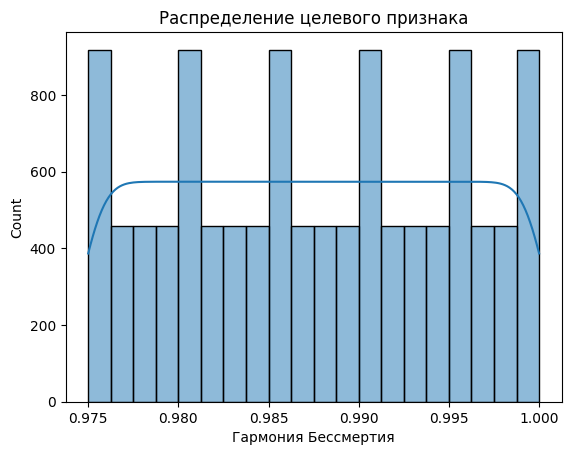

Train shape: (9547, 18), Test shape: (2387, 18)


In [205]:
import seaborn as sns
import matplotlib.pyplot as plt

print(data.isna().sum().sort_values(ascending=False).head(10))
sns.histplot(data["Гармония Бессмертия"], bins=20, kde=True)
plt.title("Распределение целевого признака")
plt.show()

X = data.drop(columns=["Гармония Бессмертия"])
y = data["Гармония Бессмертия"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# 3

### 1) кодирование категориальных признаков (модифицированный лейбл)

In [206]:
#посмотррим категориальные признаки
cat_columns = X_train.select_dtypes(include=['object', 'category'])
print(cat_columns)

#посмотрим уникальные значения(понадобится для кодирования)
print("Уникальные значения в X_train['Тип Вектора Мощи']:")
print(X_train["Тип Вектора Мощи"].unique())

      Тип Вектора Мощи
3685     Выше среднего
5886            Слабый
6108           Сильный
7713            Слабый
3499           Сильный
...                ...
11284          Сильный
5191           Сильный
5390           Сильный
860      Выше среднего
7270           Сильный

[9547 rows x 1 columns]
Уникальные значения в X_train['Тип Вектора Мощи']:
['Выше среднего', 'Слабый', 'Сильный', 'Ниже среднего']
Categories (4, object): ['Выше среднего', 'Ниже среднего', 'Сильный', 'Слабый']


##### т.к. лейбл кодироет по порядку а не по смыслу, зададим порядок сами

In [207]:
# Задаём порядок вручную (по смыслу признака)
label_mapping = {
    "Слабый": 0,
    "Ниже среднего": 1,
    "Выше среднего": 2,
    "Сильный": 3
}

# Применяем к обучающей выборке
X_train["Тип Вектора Мощи"] = X_train["Тип Вектора Мощи"].map(label_mapping)


### применим к тестовой выборке

In [208]:
X_test["Тип Вектора Мощи"] = X_test["Тип Вектора Мощи"].map(label_mapping)
X_train.head(10)

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Температура выдоха Истока,Приток давления Выдоха Истока,Давление вдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока,Тип Вектора Мощи
3685,5.140,NaN,21634.909,201.516309,8497.497,175.278,175.278,704.972,736,NaN,2.078,NaN,11.004,NaN,24.951,0.494,0.965,2
5886,1.138,1.54332,2706.698,138.966361,6622.351,6.270,6.270,545.800,736,NaN,1.184,NaN,6.450,NaN,26.222,0.194,0.975,0
6108,7.148,10.80324,38998.248,280.444531,9120.644,332.275,332.275,835.034,736,NaN,2.980,NaN,15.730,NaN,44.789,0.887,0.976,3
7713,1.138,1.54332,6763.006,144.782287,6697.636,9.375,9.375,620.925,736,NaN,1.322,NaN,7.078,NaN,0.000,0.278,0.982,0
3499,8.206,12.34656,50994.067,323.324443,9319.460,438.106,438.106,917.854,736,NaN,3.566,NaN,18.180,NaN,59.577,1.179,0.964,3
4963,5.140,7.71660,21630.599,201.513796,8479.072,175.272,175.272,715.290,736,NaN,2.084,1.394603,11.171,NaN,25.585,0.506,0.971,2
4091,6.175,9.25992,29791.466,241.633505,8822.265,246.201,246.201,778.048,736,NaN,2.504,NaN,13.224,NaN,34.448,0.682,0.967,2
6489,1.138,1.54332,3346.542,148.184423,6712.135,11.322,11.322,529.705,736,NaN,1.221,NaN,6.532,NaN,0.000,0.162,0.977,0
1379,3.144,4.62996,8380.957,145.222005,7159.710,60.377,60.377,585.006,736,NaN,1.387,NaN,7.410,NaN,12.226,0.242,0.955,1
9440,9.300,13.88988,72763.303,372.841912,9738.873,644.962,644.962,1063.563,736,NaN,4.538,NaN,22.854,NaN,88.590,1.754,0.990,3


### заполнение пропусков

In [209]:
# Сколько NaN в каждом столбце (только в train!)
print("Пропуски в X_train:")
print(X_train.isna().sum())

Пропуски в X_train:
Вектор Мощи                          0
Скорость перехода через портал     961
Приток Силы Потока                   0
Ритм магического ядра                0
Поток Энергий                        0
Сила Левого Потока                   0
Сила Правого Потока                  0
Пламя Стихий                         0
Температура вдоха Истока             0
Температура выдоха Истока         7160
Приток давления Выдоха Истока        0
Давление вдоха Истока             7603
Давление выдоха Истока               0
Древний Ветер                     7160
Печать Чародея                       0
Эмульсия Истока                      0
Дыхание Истока                       0
Тип Вектора Мощи                     0
dtype: int64


In [210]:
#Удалим где много пропусков
X_train = X_train.drop(columns=["Древний Ветер", "Давление вдоха Истока", "Температура выдоха Истока"])
X_test = X_test.drop(columns=["Древний Ветер", "Давление вдоха Истока", "Температура выдоха Истока"])

# Получаем список всех числовых признаков
num_cols = X_train.select_dtypes(include=['number']).columns.tolist()
print("Числовые столбцы:", num_cols)

Числовые столбцы: ['Вектор Мощи', 'Скорость перехода через портал', 'Приток Силы Потока', 'Ритм магического ядра', 'Поток Энергий', 'Сила Левого Потока', 'Сила Правого Потока', 'Пламя Стихий', 'Температура вдоха Истока', 'Приток давления Выдоха Истока', 'Давление выдоха Истока', 'Печать Чародея', 'Эмульсия Истока', 'Дыхание Истока']


##### используем статистический подход

In [211]:
#функция кл-дивергенции
from scipy.stats import entropy

def kl_div(p, q):
    p = np.array(p) + 1e-10  # избегаем log(0)
    q = np.array(q) + 1e-10
    p = p / p.sum()
    q = q / q.sum()
    return entropy(p, q)


Анализ признака: Скорость перехода через портал
  mean: KL = 0.106094
  median: KL = 0.028762


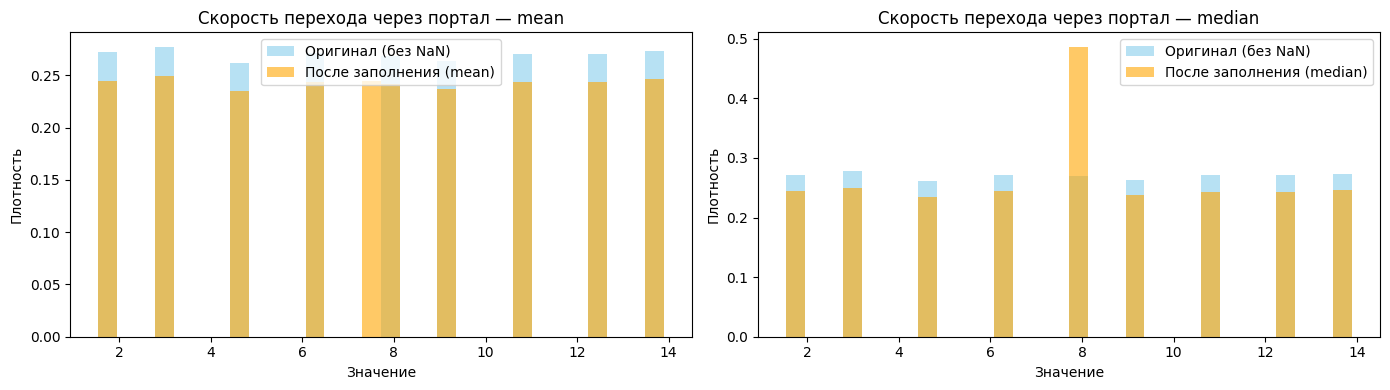

Выбрано: median = 7.7166 (KL = 0.028762)



In [212]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import entropy


best_fill_values = {}

for col in num_cols:
    if X_train[col].isna().sum() == 0:
        continue

    print(f"\nАнализ признака: {col}")
    orig = X_train[col].dropna()

    # Кандидаты для заполнения
    candidates = {
        'mean': orig.mean(),
        'median': orig.median()
    }

    best_kl = float('inf')
    best_val = candidates['median']
    best_name = 'median'

    # Строим гистограмму оригинала (без NaN)
    plt.figure(figsize=(14, 4))

    for i, (name, val) in enumerate(candidates.items(), 1):
        # Заполняем пропуски
        filled = X_train[col].fillna(val)

        # Строим гистограммы
        plt.subplot(1, 2, i)
        plt.hist(orig, bins=30, alpha=0.6, label='Оригинал (без NaN)', density=True, color='skyblue')
        plt.hist(filled, bins=30, alpha=0.6, label=f'После заполнения ({name})', density=True, color='orange')
        plt.title(f'{col} — {name}')
        plt.xlabel('Значение')
        plt.ylabel('Плотность')
        plt.legend()

        # Вычисляем KL-дивергенцию
        hist_orig, bins = np.histogram(orig, bins=30, density=True)
        hist_filled, _ = np.histogram(filled, bins=bins, density=True)
        kl = kl_div(hist_orig, hist_filled)
        print(f"  {name}: KL = {kl:.6f}")

        if kl < best_kl:
            best_kl = kl
            best_val = val
            best_name = name

    plt.tight_layout()
    plt.show()  

    best_fill_values[col] = best_val
    print(f"Выбрано: {best_name} = {best_val:.4f} (KL = {best_kl:.6f})\n")

### используем машинный подход( именно этот,т.к. пропуском много и он не сможет найти какието похожие значения, а вычислит их как функцию от других переменных)

In [213]:

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Создаём и обучаем импьютер на X_train (уже без категориальных признаков!)
iter_imp = IterativeImputer(random_state=42, max_iter=10)



### 4)применяем на тест и на трейн

In [214]:
#применяем статистические к трейн и тест
X_train_stat = X_train.copy()
X_test_stat = X_test.copy()

for col, fill_val in best_fill_values.items():
    X_train_stat[col] = X_train_stat[col].fillna(fill_val)
    X_test_stat[col] = X_test_stat[col].fillna(fill_val)

print(" Статистическое заполнение завершено.")

 Статистическое заполнение завершено.


In [215]:
#применяем машинное на трейна и на тесте
X_train_iter = pd.DataFrame(
    iter_imp.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)

X_test_iter = pd.DataFrame(
    iter_imp.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)


print(" Машинное заполнение (IterativeImputer) завершено.")

 Машинное заполнение (IterativeImputer) завершено.


### проверим что лучше сработало

In [216]:
def compare_distributions(original, filled, col_name):
    hist_orig, bins = np.histogram(original.dropna(), bins=30, density=True)
    hist_filled, _ = np.histogram(filled, bins=bins, density=True)
    kl = kl_div(hist_orig, hist_filled)
    print(f"{col_name}: KL = {kl:.6f}")
    return kl

# Пример для одного признака
col = "Скорость перехода через портал"
orig = X_train[col]

kl_stat = compare_distributions(orig, X_train_stat[col], "Статистическое")
kl_iter = compare_distributions(orig, X_train_iter[col], "Машинное")

print(f"\nЛучше сохраняет распределение: {'Статистическое' if kl_stat < kl_iter else 'Машинное'}")

Статистическое: KL = 0.028762
Машинное: KL = 0.011633

Лучше сохраняет распределение: Машинное


In [217]:
print("Проверка пропусков:")
print("Статистический — train:", X_train_stat.isna().sum().sum())
print("Статистический — test: ", X_test_stat.isna().sum().sum())
print("Машинный — train:      ", X_train_iter.isna().sum().sum())
print("Машинный — test:       ", X_test_iter.isna().sum().sum())

Проверка пропусков:
Статистический — train: 0
Статистический — test:  0
Машинный — train:       0
Машинный — test:        0


### 4

## 1) для каждого столбца постройте диаграмму "Ящик с усами"

Построение диаграмм 'ящик с усами' для обучающей выборки...



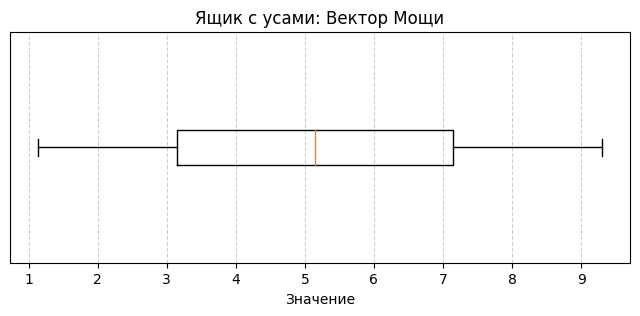

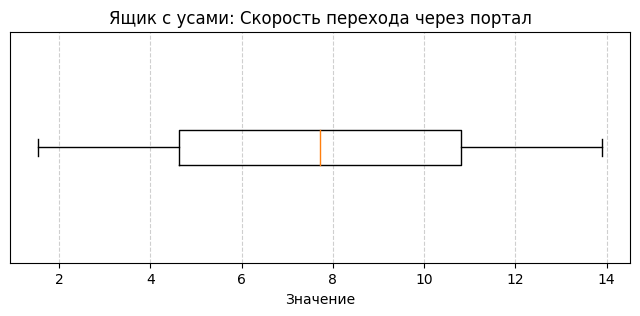

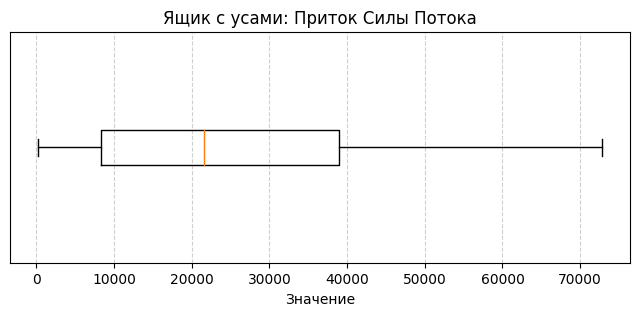

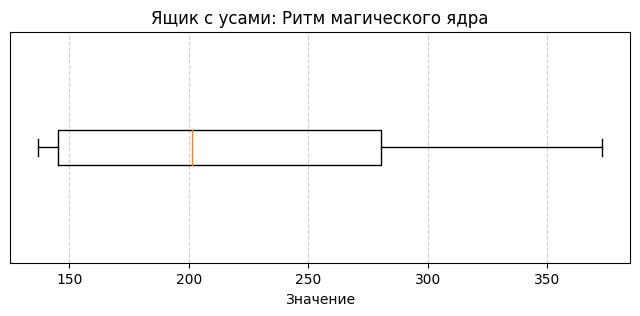

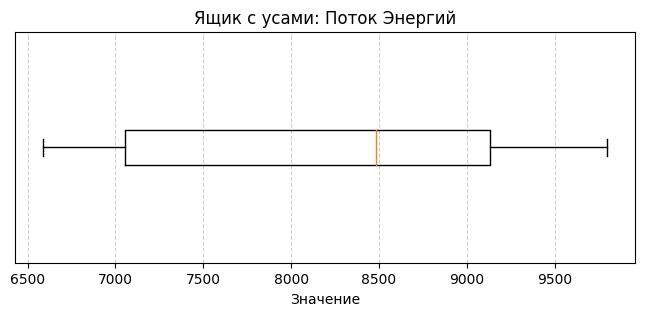

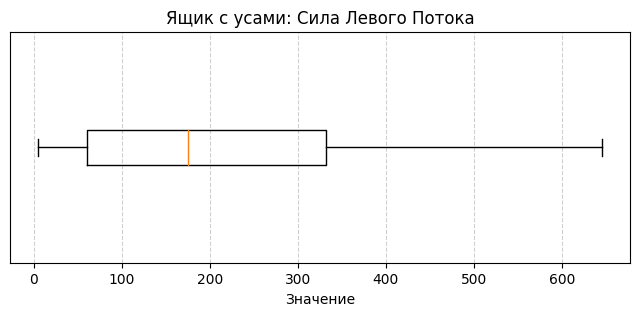

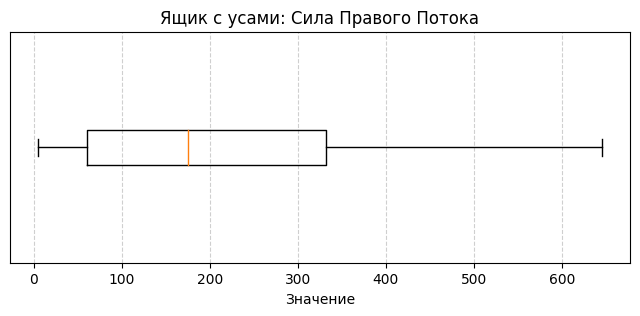

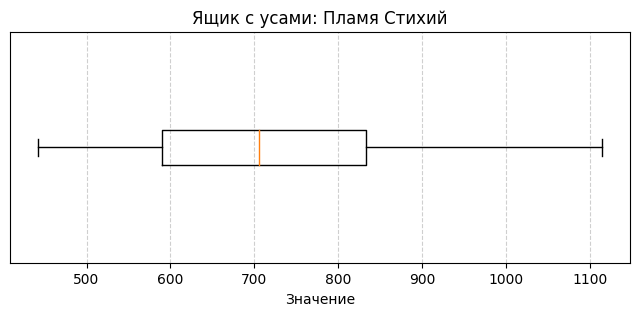

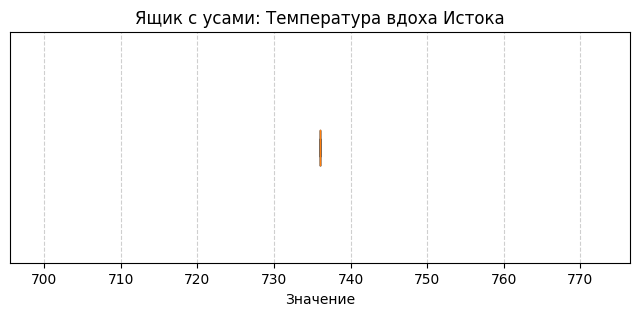

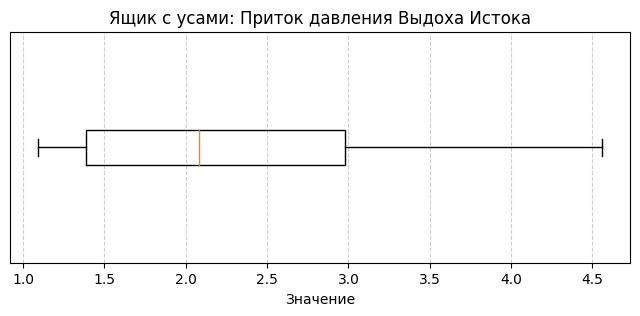

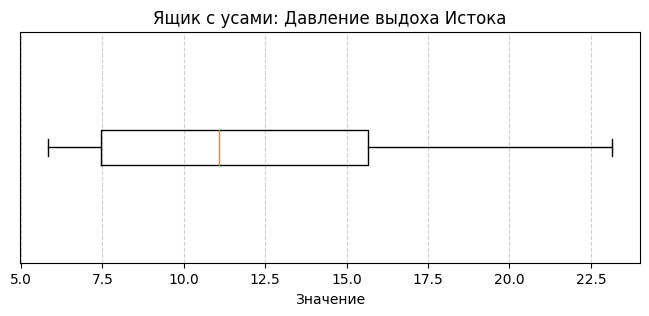

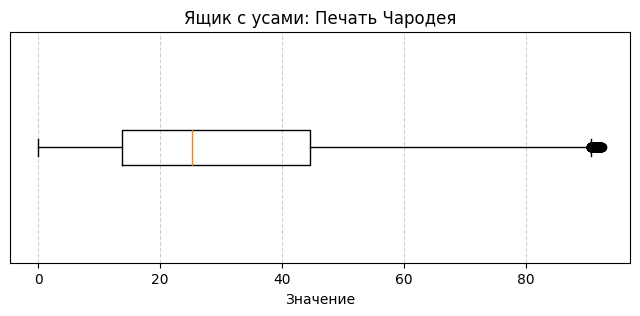

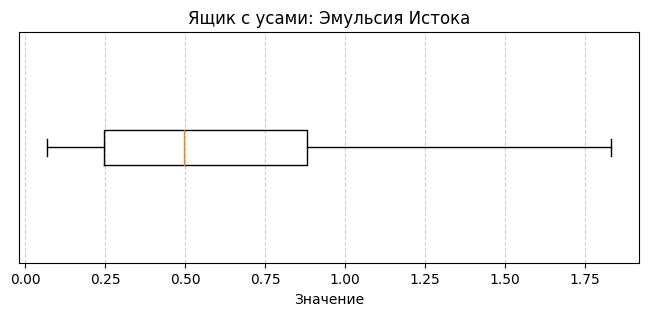

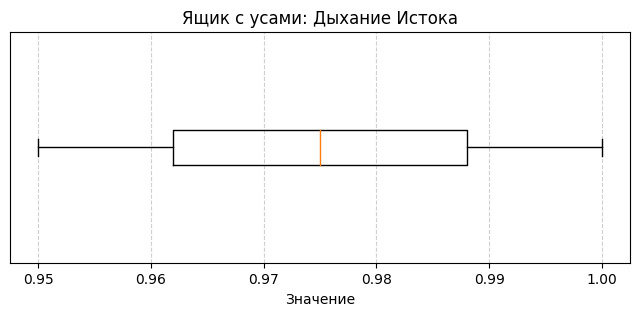

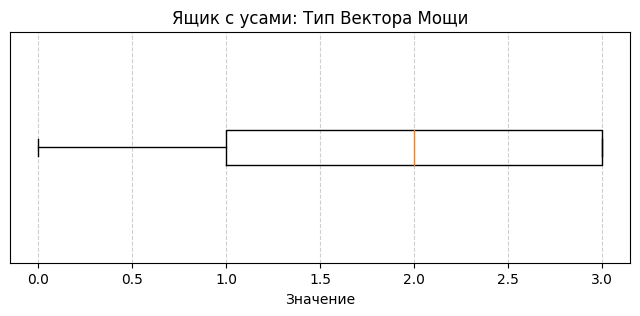

In [218]:
import matplotlib.pyplot as plt

# Берём только числовые столбцы из ОБУЧАЮЩЕЙ выборки (машинный метод)
num_cols = X_train_iter.select_dtypes(include=['number']).columns.tolist()

print("Построение диаграмм 'ящик с усами' для обучающей выборки...\n")

# Строим по одному графику на признак
for col in num_cols:
    plt.figure(figsize=(8, 3))
    plt.boxplot(X_train_iter[col].dropna(), vert=False)
    plt.title(f'Ящик с усами: {col}')
    plt.xlabel('Значение')
    plt.yticks([])  # убираем подпись оси Y
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()
    
    
    # Просто посмотри на график: если есть точки за усами — значит, есть.

##  2) то при помощи IQR и Robust Z-score отыщите строки, которые содержат выброс в столбце

In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import median_abs_deviation

In [220]:
def find_outliers_iqr(series, factor=1.5):
    """Возвращает маску (True — выброс) по методу IQR."""
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    return (series < lower_bound) | (series > upper_bound)

def find_outliers_robust_z(series, threshold=3.0):
    """Возвращает маску (True — выброс) по Robust Z-score."""
    median = series.median()
    mad = median_abs_deviation(series, nan_policy='omit')
    if mad == 0:
        return pd.Series([False] * len(series), index=series.index)
    robust_z = 0.6745 * (series - median) / mad
    return np.abs(robust_z) > threshold

In [221]:
cols_with_outliers = [
    "Печать Чародея"
]

outlier_indices = set()  # Сюда соберём индексы строк, которые нужно удалить (при машинном заполнениии)

for col in cols_with_outliers:
    print(f"\nАнализ признака: {col}")
    
    
    # Найдём выбросы по двум методам
    iqr_mask = find_outliers_iqr(X_train_iter[col])
    z_mask = find_outliers_robust_z(X_train_iter[col])
    
    # Пересечение: только те строки, что выбросы по обоим методам
    combined_mask = iqr_mask & z_mask
    outlier_rows = X_train_iter[combined_mask].index.tolist()
    
    print(f"  Выбросов по IQR: {iqr_mask.sum()}")
    print(f"  Выбросов по Robust Z: {z_mask.sum()}")
    print(f"  В пересечении: {len(outlier_rows)}")
    
    # Добавляем в общий список
    outlier_indices.update(outlier_rows)


Анализ признака: Печать Чародея
  Выбросов по IQR: 186
  Выбросов по Robust Z: 1063
  В пересечении: 186


## Отбросьте строки, которые были найдены

In [222]:
# Удаляем эти строки из train (машинный)
X_train_iter_iqr = X_train_iter.drop(index=outlier_indices)
y_train_iqr = y_train.drop(index=outlier_indices)

## визуализируем

In [223]:
print(f"\n Удалено {len(outlier_indices)} строк с выбросами.")
print(f"Новый размер train: {X_train_iter_iqr.shape[0]}")


 Удалено 186 строк с выбросами.
Новый размер train: 9361


## 3)Выполните поиск аномалий при помощи алгоритмов Isolation Forest, One-class SVM и DBSCAN (библиотека pyod)

In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.cluster import DBSCAN

In [225]:
# Укажи признак с выбросами (машинным)
col= "Печать Чародея"

#  используем целевую переменную как второй признак
 
X_2d = X_train_iter[[col]].copy()
X_2d['Гармония Бессмертия'] = y_train.values
X_2d_np = X_2d.values


In [226]:
# 1. Isolation Forest
iforest = IsolationForest(contamination=0.1, random_state=42)
iforest_labels = iforest.fit_predict(X_2d_np)
anomalies_iforest = (iforest_labels == -1)  # в sklearn: -1 = аномалия

# 2. One-class SVM
ocsvm = OneClassSVM(nu=0.1)  # nu ≈ contamination
ocsvm_labels = ocsvm.fit_predict(X_2d_np)
anomalies_ocsvm = (ocsvm_labels == -1)

# 3. DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_2d_np)
anomalies_dbscan = (dbscan_labels == -1)  # шум = -1 → аномалия

## Визуализируйте аномалии, найденные при помощи каждого алгоритма, на двумерной плоскости. Также визуализируйте количество найденных аномальных объектов в каждом случае. 

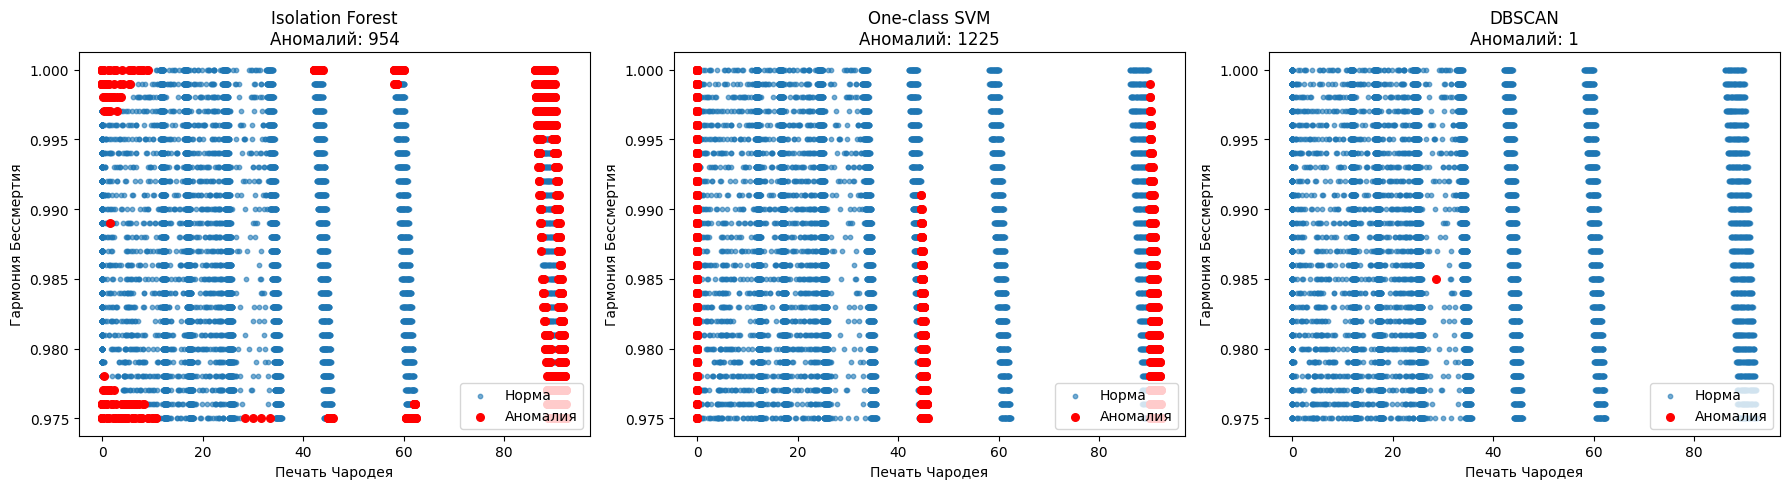

In [227]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

methods = [
    ("Isolation Forest", anomalies_iforest),
    ("One-class SVM", anomalies_ocsvm),
    ("DBSCAN", anomalies_dbscan)
]

for ax, (name, mask) in zip(axes, methods):
    ax.scatter(X_2d_np[~mask, 0], X_2d_np[~mask, 1], s=10, alpha=0.6, label='Норма')
    ax.scatter(X_2d_np[mask, 0], X_2d_np[mask, 1], s=30, color='red', label='Аномалия')
    ax.set_title(f"{name}\nАномалий: {mask.sum()}")
    ax.set_xlabel(col)
    ax.set_ylabel('Гармония Бессмертия')
    ax.legend()

plt.tight_layout()
plt.show()

## В качестве результирующего множества аномальных строк возьмите пересечение множеств строк, которые были получены в результате работы трех алгоритмов (в моем случае 2х-Isolation Forest и One-class SVM тк DBSCAN очень мало строк нашел).

In [228]:
# Аномалия, если все три алгоритма её нашли
final_anomalies = anomalies_iforest & anomalies_ocsvm 

print(f"Аномалий по каждому методу:")
print(f"  Isolation Forest: {anomalies_iforest.sum()}")
print(f"  One-class SVM:    {anomalies_ocsvm.sum()}")
print(f"  DBSCAN:           {anomalies_dbscan.sum()}")
print(f"  В пересечении:    {final_anomalies.sum()}")

# Индексы аномальных строк
anomaly_indices = X_2d[final_anomalies].index
print(f"\nИндексы для удаления: {anomaly_indices.tolist()}")

Аномалий по каждому методу:
  Isolation Forest: 954
  One-class SVM:    1225
  DBSCAN:           1
  В пересечении:    354

Индексы для удаления: [7713, 620, 3068, 1889, 2015, 7037, 5608, 449, 530, 6101, 431, 782, 440, 10053, 2249, 6076, 6535, 872, 11701, 476, 6560, 474, 1349, 2574, 6778, 2870, 5885, 809, 1880, 8893, 2177, 1034, 9604, 5140, 1259, 3077, 3329, 323, 1097, 6110, 2375, 3527, 5651, 3285, 1313, 611, 2114, 6092, 2861, 1808, 3761, 1295, 3050, 9585, 818, 1043, 3095, 332, 1395, 1115, 1052, 6119, 1322, 5833, 1025, 3320, 485, 2132, 350, 9342, 6301, 5399, 6067, 7966, 1502, 1070, 503, 1176, 693, 413, 5156, 1223, 5183, 2636, 942, 179, 737, 800, 377, 3518, 773, 962, 2825, 1410, 11691, 4715, 5165, 1152, 665, 26, 1916, 1133, 9838, 6794, 2331, 1340, 1583, 1412, 5417, 1754, 6569, 8902, 1781, 548, 3986, 2888, 6578, 296, 2580, 8406, 2112, 684, 998, 494, 1079, 4229, 8191, 1547, 9117, 8425, 4472, 755, 746, 7496, 170, 242, 1644, 5856, 305, 143, 1161, 1878, 44, 1187, 4013, 4686, 4922, 240, 1620,

## Отбросьте строки, которые были найдены на шаге 3. Визуализируйте количество строк, содержащих аномалии.

In [229]:
X_train_iter_ansambl = X_train_iter.drop(index=anomaly_indices)
y_train_ansambl = y_train.drop(index=anomaly_indices)
print(f"Финальный размер train: {X_train_iter_ansambl.shape[0]}")

Финальный размер train: 9193


### проверим что лучше сработало

In [230]:
def compare_stats(X_orig, X_clean, name, col):
    orig = X_orig[col].dropna()
    clean = X_clean[col]
    print(f"{name}:")
    print(f"  IQR: {orig.quantile(0.75)-orig.quantile(0.25):.3f} → {clean.quantile(0.75)-clean.quantile(0.25):.3f}")
    print(f"  std: {orig.std():.3f} → {clean.std():.3f}")
    print(f"  медиана: {orig.median():.3f} → {clean.median():.3f}")
    print()

compare_stats(X_train_iter, X_train_iter_iqr, "IQR + Z-score", col)
compare_stats(X_train_iter, X_train_iter_ansambl, "Ансамбль", col)

IQR + Z-score:
  IQR: 30.773 → 31.209
  std: 25.852 → 24.780
  медиана: 25.242 → 25.123

Ансамбль:
  IQR: 30.773 → 30.471
  std: 25.852 → 24.353
  медиана: 25.242 → 25.123



### дальше работаем только с данными после ансамблей

### 5

In [231]:
import seaborn as sns
import matplotlib.pyplot as plt

### 1) тепловую карту корреляции входных признаков

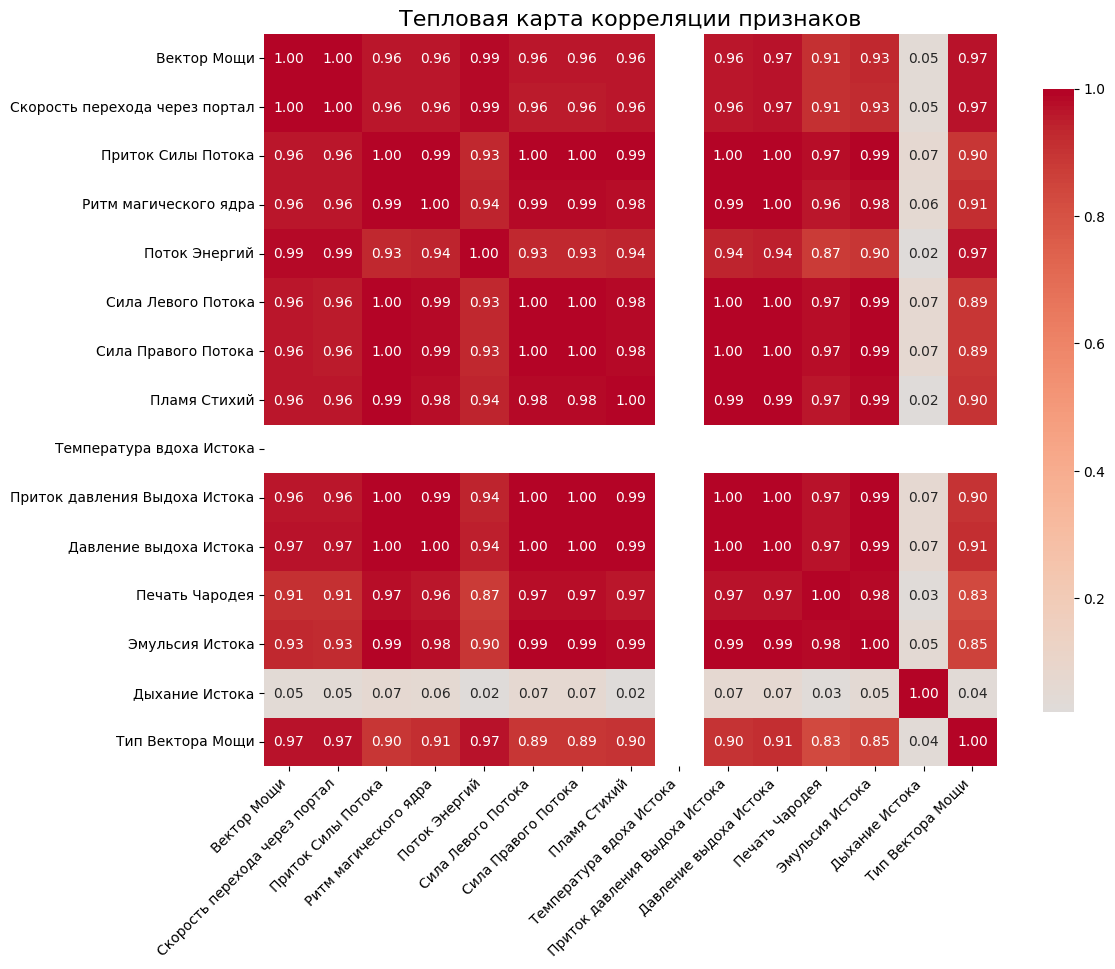

In [232]:
# Вычисляем матрицу корреляций (Пирсона)
corr_matrix = X_train_iter_ansambl.corr()

# Строим тепловую карту
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,          # показывать числа в ячейках
    fmt=".2f",           # формат: 2 знака после запятой
    cmap="coolwarm",     # цветовая схема: синий (-1), белый (0), красный (+1)
    center=0,            # центр цвета — 0
    square=True,         # ячейки — квадраты
    cbar_kws={"shrink": 0.8}
)

plt.title("Тепловая карта корреляции признаков", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### 2) устраним мультиколлениарность

### Общая мощность потоков = Приток Силы Потока + Сила Левого Потока + Сила Правого Потока

In [233]:

X_train_iter_ansambl['Общая мощность потоков'] = (
    X_train_iter_ansambl['Приток Силы Потока'] +
    X_train_iter_ansambl['Сила Левого Потока'] +
    X_train_iter_ansambl['Сила Правого Потока']
)

X_test_iter['Общая мощность потоков'] = (
    X_test_iter['Приток Силы Потока'] +
    X_test_iter['Сила Левого Потока'] +
    X_test_iter['Сила Правого Потока']
)

### Общая сила потоков = Сила левого потока - Сила правого потока

In [234]:

X_train_iter_ansambl['Общая сила потоков'] = (
    X_train_iter_ansambl['Сила Левого Потока'] -
    X_train_iter_ansambl['Сила Правого Потока']
)

X_test_iter['Общая сила потоков'] = (
    X_test_iter['Сила Левого Потока'] -
    X_test_iter['Сила Правого Потока']
)

### Общее давление на выдохе = Давление выдоха истока + Приток давления выдоха истока

In [235]:
X_train_iter_ansambl['Общее Давление на выдохе'] = (
    X_train_iter_ansambl['Давление выдоха Истока'] +
    X_train_iter_ansambl['Приток давления Выдоха Истока']
)

X_test_iter['Общее Давление на выдохе'] = (
    X_test_iter['Давление выдоха Истока'] +
    X_test_iter['Приток давления Выдоха Истока']
)

### Магическая производительность = Скорость прохода через портал / Эмульсия истока

In [236]:
X_train_iter_ansambl['Магическая Производительность'] = (
    X_train_iter_ansambl['Скорость перехода через портал'] /
    X_train_iter_ansambl['Эмульсия Истока']
)

X_test_iter['Магическая Производительность'] = (
    X_test_iter['Скорость перехода через портал'] /
    X_test_iter['Эмульсия Истока']
)

### Эффективность ядра = Общая сила ядра / Эмульсия истока

In [237]:
X_train_iter_ansambl['Эффективность Ядра'] = (
    X_train_iter_ansambl['Ритм магического ядра'] *
    X_train_iter_ansambl['Приток Силы Потока'] /
    X_train_iter_ansambl['Эмульсия Истока']
)

X_test_iter['Эффективность Ядра'] = (
    X_test_iter['Ритм магического ядра'] *
    X_test_iter['Приток Силы Потока'] /
    X_test_iter['Эмульсия Истока']
)


### Соотношение мощности к давлению =  Общая мощность потоков / Общее давление на выходе

In [238]:
# Избегаем деления на ноль
eps = 1e-8

X_train_iter_ansambl['Соотношение мощности к давлению'] = (
    X_train_iter_ansambl['Общая мощность потоков'] /
    (X_train_iter_ansambl['Общее Давление на выдохе'] + eps)
)

X_test_iter['Соотношение мощности к давлению'] = (
    X_test_iter['Общая мощность потоков'] /
    (X_test_iter['Общее Давление на выдохе'] + eps)
)

In [239]:
#Удалим старые признаки чтоб сохранить размерность
X_train_final = X_train_iter_ansambl.drop(columns=[
    'Приток Силы Потока',
    'Сила Левого Потока',
    'Сила Правого Потока',
    'Давление выдоха Истока',
    'Приток давления Выдоха Истока',
    'Ритм магического ядра',
    'Приток Силы Потока',
    'Общая мощность потоков',
    'Общее Давление на выдохе'
])

X_test_final = X_test_iter.drop(columns=[
    'Приток Силы Потока',
    'Сила Левого Потока',
    'Сила Правого Потока',
    'Давление выдоха Истока',
    'Приток давления Выдоха Истока',
    'Ритм магического ядра',
    'Приток Силы Потока',
    'Общая мощность потоков',
    'Общее Давление на выдохе'
])

### посмотрим изменения

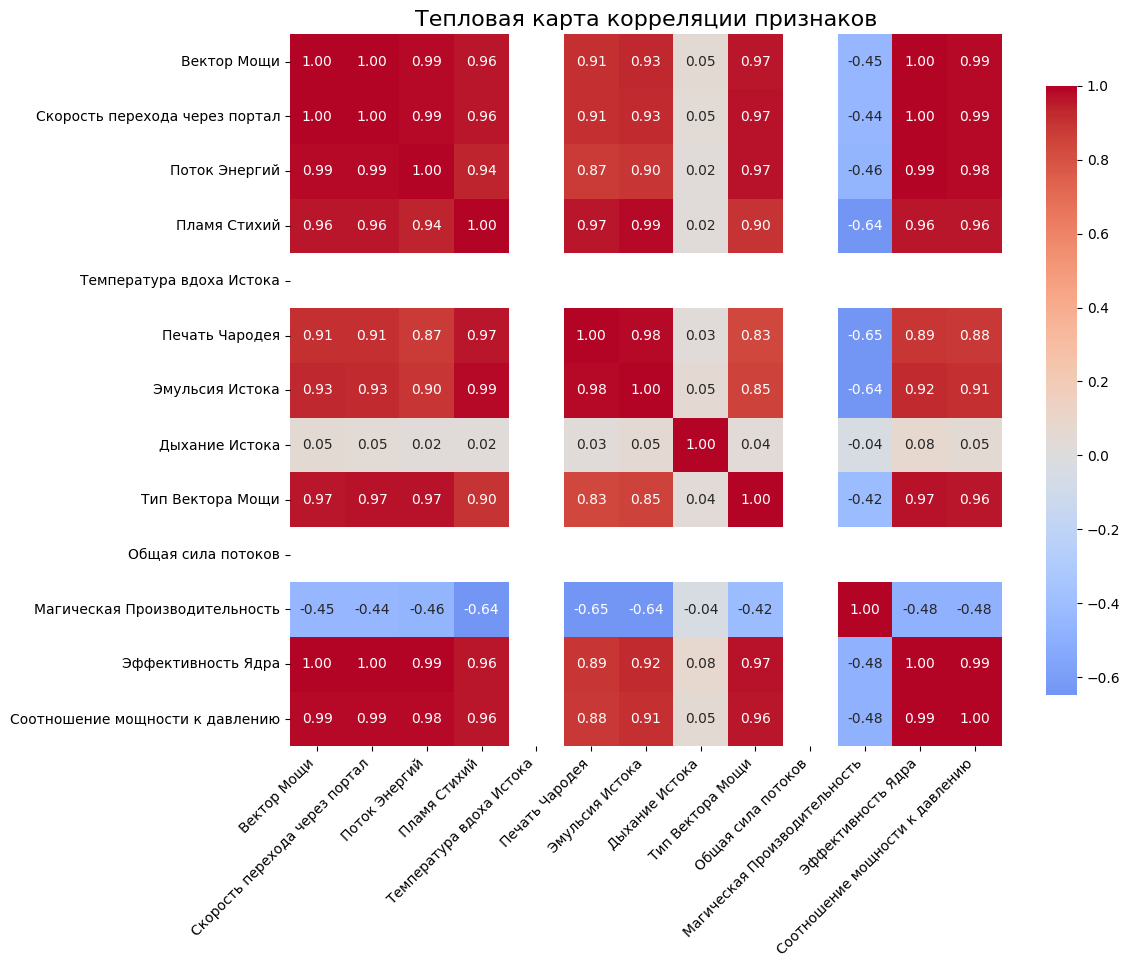

In [240]:
# Вычисляем матрицу корреляций (Пирсона)
corr_matrix = X_train_final.corr()

# Строим тепловую карту
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,          # показывать числа в ячейках
    fmt=".2f",           # формат: 2 знака после запятой
    cmap="coolwarm",     # цветовая схема: синий (-1), белый (0), красный (+1)
    center=0,            # центр цвета — 0
    square=True,         # ячейки — квадраты
    cbar_kws={"shrink": 0.8}
)

plt.title("Тепловая карта корреляции признаков", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### 4)Исследуйте проблему диспропорции значений признаков

In [241]:
print("Статистика признаков (только числовые):")
display(X_train_final.describe())

Статистика признаков (только числовые):


,Вектор Мощи,Скорость перехода через портал,Поток Энергий,Пламя Стихий,Температура вдоха Истока,Печать Чародея,Эмульсия Истока,Дыхание Истока,Тип Вектора Мощи,Общая сила потоков,Магическая Производительность,Эффективность Ядра,Соотношение мощности к давлению
count,9193.000000,9193.000000,9193.000000,9193.000000,9193.0,9193.000000,9193.000000,9193.000000,9193.000000,9193.0,9193.000000,9.193000e+03,9193.000000
mean,5.073774,7.578325,8165.435484,726.862934,736.0,32.327187,0.634624,0.975533,1.637224,0.0,13.983074,8.639026e+06,1551.064912
std,2.565706,3.896591,1072.652492,165.180725,0.0,24.353215,0.478762,0.014622,1.146149,0.0,4.218260,4.332486e+06,744.065304
min,1.138000,1.540684,6589.002000,442.364000,736.0,0.000000,0.068000,0.950000,0.000000,0.0,4.559424,4.373923e+05,38.634946
25%,3.144000,4.629960,7054.893000,589.607000,736.0,13.670000,0.246000,0.963000,1.000000,0.0,10.489856,4.906130e+06,950.794403
50%,5.140000,7.716600,8476.972000,702.973000,736.0,25.123000,0.493000,0.976000,2.000000,0.0,13.698107,8.733744e+06,1664.702816
75%,7.148000,10.803240,9128.423000,827.688000,736.0,44.141000,0.874000,0.988000,3.000000,0.0,17.997901,1.261474e+07,2146.022302
max,9.300000,13.896442,9797.103000,1097.810000,736.0,91.023000,1.802000,1.000000,3.000000,0.0,25.094634,1.592358e+07,2783.883935


### 5)примените скалирование

In [242]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# 1. Стандартизация (среднее=0, std=1)
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train_final)
X_test_std = scaler_std.transform(X_test_final)

# 2. Min-Max (в диапазон [0, 1])
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train_final)
X_test_minmax = scaler_minmax.transform(X_test_final)

# 3. Робастное (медиана=0, масштаб по IQR)
scaler_robust = RobustScaler()
X_train_robust = scaler_robust.fit_transform(X_train_final)
X_test_robust = scaler_robust.transform(X_test_final)